In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("ticks")

In [3]:
# Load data

train = pd.read_csv('./data/train.csv')
greeks = pd.read_csv('./data/greeks.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
# Set index

train = train.set_index('Id')
test = test.set_index('Id')
greeks = greeks.set_index('Id')

# Separate target and features
X = train.drop('Class', axis = 1)
y = train['Class']

In [5]:
# Get features list
violin_features = list(X.columns)
categorial_features = X.columns[X.dtypes != float].values.tolist()

# Remove non-float features
violin_features.remove(*categorial_features)

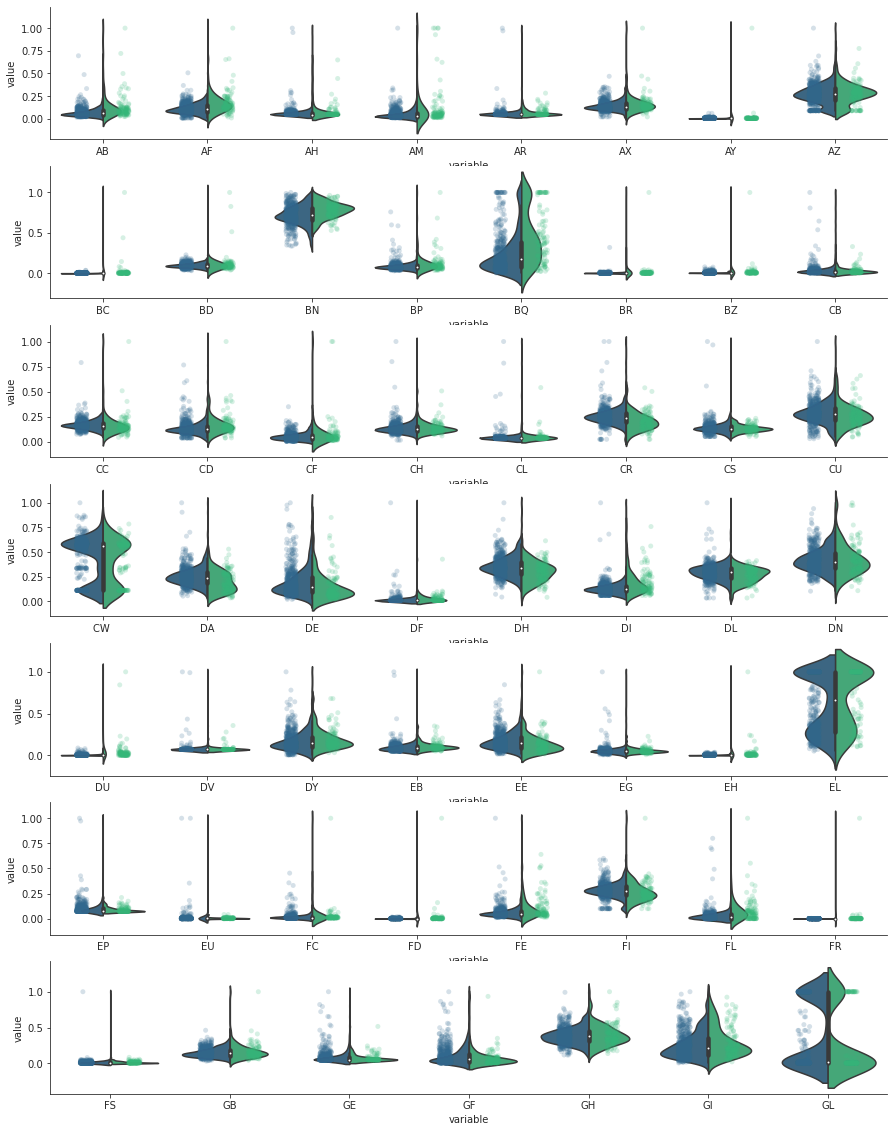

In [6]:
# Plot violin plots of non-categorial features

fig, axs = plt.subplots(nrows = 7, ncols = 1, figsize = (15, 20))

axs = np.ravel(axs)

for row in range(7):
    features = violin_features[row*8:(row+1)*8]
    df_plot = train[features+['Class']]
    df_plot = df_plot / df_plot.max(axis = 0) # Normalize them for plotting purposes
    df_plot = df_plot.melt(id_vars = ['Class'], value_vars = features)
    sns.violinplot(data = df_plot, x = 'variable', y = 'value', hue = 'Class', split = True,palette = 'viridis', ax = axs[row])
    sns.stripplot(data = df_plot, x = 'variable', y = 'value', hue = 'Class', dodge = True,palette = 'viridis', alpha = 0.2, ax = axs[row])
    axs[row].get_legend().remove()
sns.despine()
#plt.tight_layout()

In [7]:
# Highly concentrated AY, BC, BR, BZ, DU, EH, EU, FR 
# Large AM -> Highly likely Green
# Large CR -> Slightly likely blue
# Large DH -> Slightly likely blue
# Large DA -> Slightly likely blue
# Large EE -> Slightly likely blue
# Large FI -> Slightly likely blue


In [12]:
train.corr()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.350231,0.249246,0.530687,0.157712,0.471912,0.011004,0.158569,0.331736,0.278920,...,0.169934,0.017990,0.036913,0.318741,0.003327,-0.017192,0.148456,0.002903,-0.061601,0.280612
AF,0.350231,1.000000,0.044140,0.183961,0.044917,0.248439,0.039417,0.219172,0.058831,0.045430,...,0.148289,0.021009,-0.003108,0.079993,0.076449,-0.159796,0.187105,0.140935,-0.127870,0.302638
AH,0.249246,0.044140,1.000000,0.128268,0.749794,0.039324,0.055385,0.095627,0.366910,0.209508,...,-0.022822,-0.009112,0.018328,0.159666,0.011332,-0.029422,-0.037542,-0.073142,0.029175,0.044645
AM,0.530687,0.183961,0.128268,1.000000,0.175212,0.225382,0.081666,0.131885,0.329658,0.277908,...,0.187974,-0.009183,0.040846,0.217443,-0.012176,-0.019639,0.089008,0.100873,-0.079717,0.239170
AR,0.157712,0.044917,0.749794,0.175212,1.000000,0.011715,0.099947,0.099282,0.073730,-0.002509,...,0.080164,-0.007933,0.068271,0.002816,0.034682,0.027927,-0.120285,0.074428,0.028150,0.064380
AX,0.471912,0.248439,0.039324,0.225382,0.011715,1.000000,0.016315,0.269728,0.079799,0.124581,...,0.020747,-0.014095,0.045893,0.233188,0.099148,0.075500,0.119736,0.046596,-0.004384,0.097616
AY,0.011004,0.039417,0.055385,0.081666,0.099947,0.016315,1.000000,0.036790,0.132495,0.506917,...,-0.027435,-0.002789,-0.010552,0.025665,0.002803,-0.006869,0.196392,0.022473,0.067403,0.082420
AZ,0.158569,0.219172,0.095627,0.131885,0.099282,0.269728,0.036790,1.000000,0.036424,0.135976,...,-0.050647,-0.010384,0.020465,0.223358,0.016947,0.218551,0.111962,0.067379,0.112823,0.013516
BC,0.331736,0.058831,0.366910,0.329658,0.073730,0.079799,0.132495,0.036424,1.000000,0.753051,...,-0.018865,0.034514,0.018158,0.419790,0.052096,-0.043482,0.128950,-0.020755,0.041742,0.155882
BD,0.278920,0.045430,0.209508,0.277908,-0.002509,0.124581,0.506917,0.135976,0.753051,1.000000,...,-0.008830,-0.010248,0.021651,0.439534,-0.003691,0.005017,0.212123,-0.009943,0.020937,0.112184
